# Laboratory Exercise 2 - Starter (2 points)

In this assignment, you will build a model to predict laptop prices using the provided `laptops.csv` dataset.

Your tasks are as follows:

1. Perform Exploratory Data Analysis (EDA) to understand the dataset.
2. Preprocess the data to prepare it for modeling.
3. Train and evaluate a machine learning model to predict laptop prices.

**Notes:**

- Some parts of the code are already provided. **Do not modify the existing code.**
- **Do not hard-code** any values or test data. There are hidden tests that will check your implementation.
- Write your solution only in the sections marked with `### YOUR SOLUTION`.
- Each task description indicates whether it is **automatically** or **manually graded**.
- You can verify automatically graded tasks using the cell labeled `### TEST` after each function.

***IMPORTANT NOTE:***
- Name your Jupyter Notebook as `lab_ex_2_{index}.ipynb`.
- For example, if your index is 123456, you should name your notebook as `lab_ex_2_12346.ipynb`.

In [229]:
import os
import hashlib
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import (
    PolynomialFeatures,
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
)
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    confusion_matrix,
    classification_report,
)
from sklearn.linear_model import (
    LinearRegression,
    Lasso,
    Ridge,
    LassoCV,
    RidgeCV,
    LogisticRegression,
)
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [231]:
os.environ["PYTHONHASHSEED"] = "42"
random.seed(42)
np.random.seed(42)

RANDOM_STATE = 42

In [232]:
def hash_columns(columns):
    col_str = ",".join(sorted(columns))
    return hashlib.sha256(col_str.encode()).hexdigest()

In [233]:
def hash_series(series):
    series_str = ",".join(map(str, series.values))
    return hashlib.sha256(series_str.encode()).hexdigest()

In [234]:
def hash_data_frame(df):
    df_sorted = df.sort_index(axis=1).sort_values(by=list(df.columns))
    return hashlib.sha256(pd.util.hash_pandas_object(df_sorted, index=True).values).hexdigest()

In [235]:
df = pd.read_csv("laptops.csv")

In [236]:
df.head()

,Brand,Model,Type,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro)
0,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,NaN,True,No OS,1.86,575.00
1,Asus,ZenBook UX430UN,Ultrabook,14.0,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,1495.00
2,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,770.00
3,HP,250 G6,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,NaN,No OS,1.86,393.90
4,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,No OS,NaN,344.99


In [237]:
### MANUALLY GRADED TASK
def calculate_descriptive_statistics(df):
    """
    Compute the descriptive statistics for all numeric columns in the dataset.
    The statistics should include: count, mean, standard deviation (std), minimum,
    25th percentile, median, 75th percentile, and maximum.
    
    Return the result as a `pd.DataFrame.
    """

    # YOUR CODE HERE
        
    return pd.DataFrame(df.describe())

    raise NotImplementedError()

In [238]:
calculate_descriptive_statistics(df)

,Dimension (in),CPU Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,791.000000,791.000000,791.000000,691.000000,791.000000
mean,15.287611,2.388369,8.601770,2.151999,1113.184956
std,1.224031,0.371062,5.173638,0.654401,601.993594
min,12.500000,1.200000,4.000000,0.910000,339.000000
25%,14.000000,2.000000,4.000000,1.725000,684.995000
50%,15.600000,2.500000,8.000000,2.100000,973.000000
75%,15.600000,2.700000,8.000000,2.400000,1349.000000
max,17.300000,2.900000,64.000000,4.700000,3975.000000


In [239]:
### MANUALLY GRADED TASK
def plot_pairwise_relationships(df):
    """
    Create pairwise plots to visualize the relationships between all numerical variables
    in the dataset using scatter plots and histograms.
    """


    # YOUR CODE HERE

    sns.pairplot(df)
    plt.show()
    
    return sns
    
    raise NotImplementedError()

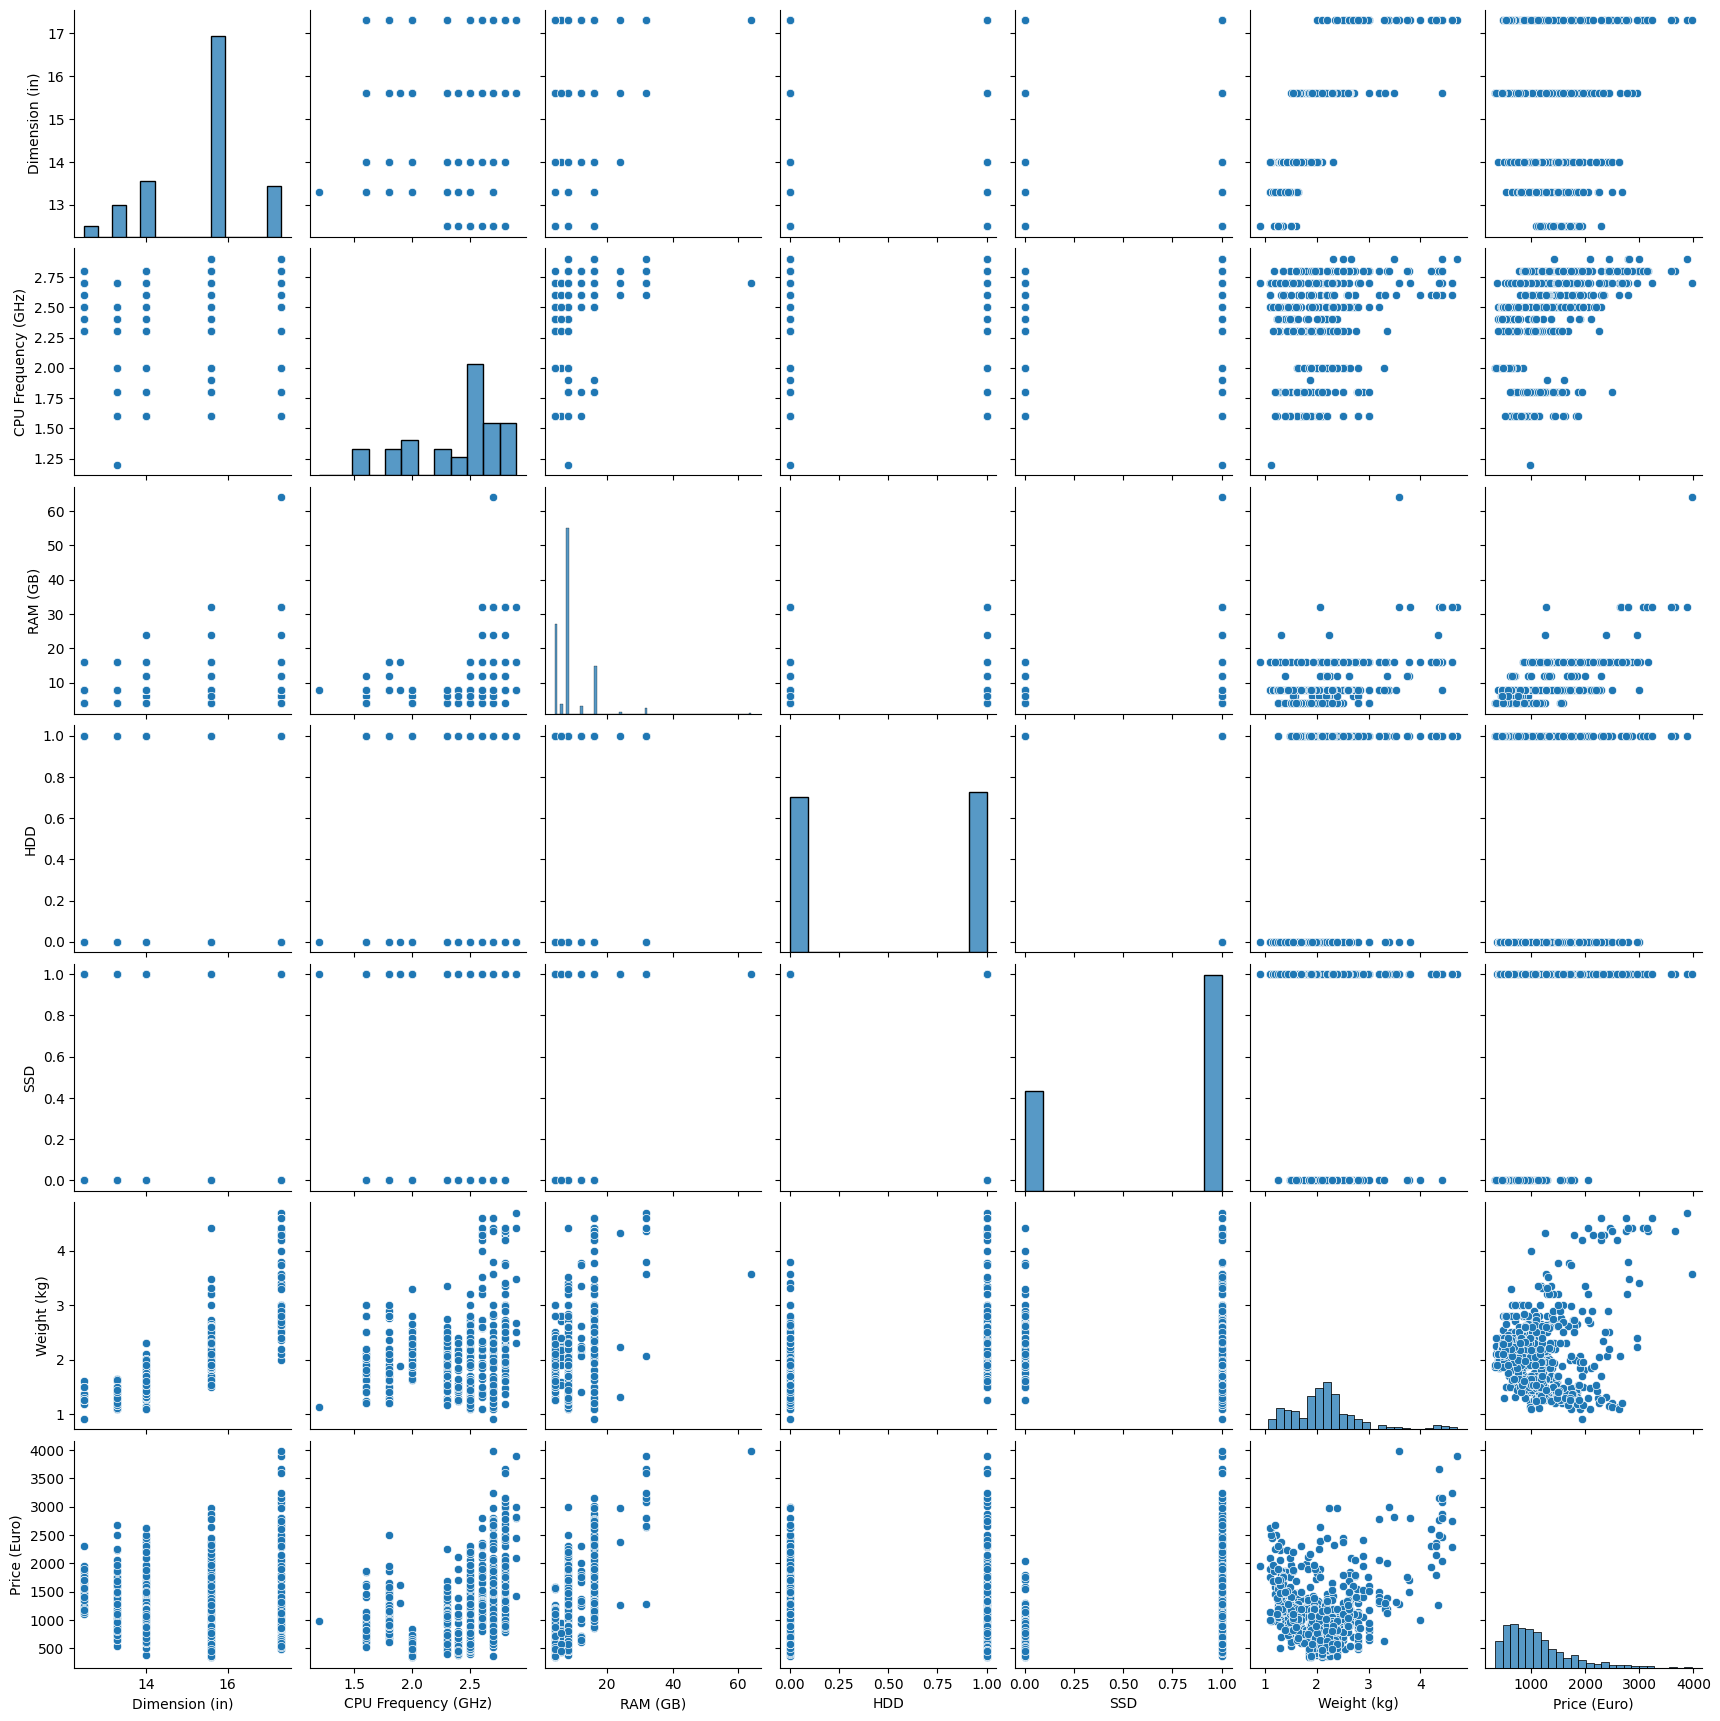

<module 'seaborn' from 'C:\\Users\\ACER\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\seaborn\\__init__.py'>

In [240]:
plot_pairwise_relationships(df)

In [241]:
### MANUALLY GRADED TASK
def plot_correlation_intensity(df):
    """
    Plot a heatmap showing the strength and direction of the Pearson correlation
    between all numeric variables in the dataset.
    """

    # YOUR CODE HERE

    sns.heatmap(df.corr(numeric_only=True),annot=True)

    return sns
    
    raise NotImplementedError()

<module 'seaborn' from 'C:\\Users\\ACER\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\seaborn\\__init__.py'>

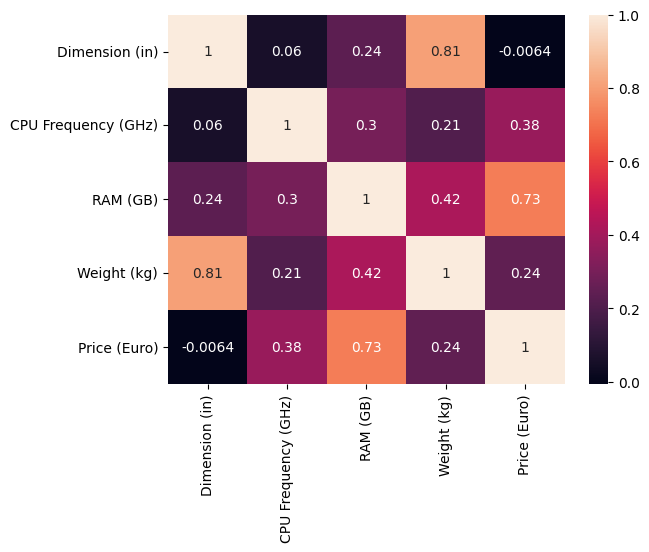

In [242]:
plot_correlation_intensity(df)

In [243]:
### MANUALLY GRADED TASK
def plot_price_distribution_per_type(df):
    """
    Create boxplots to show how laptop prices are distributed across different types.
    """

    # YOUR CODE HERE

    sns.boxplot(df,y="Price (Euro)",x="Type")

    return sns
    
    raise NotImplementedError()

<module 'seaborn' from 'C:\\Users\\ACER\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\seaborn\\__init__.py'>

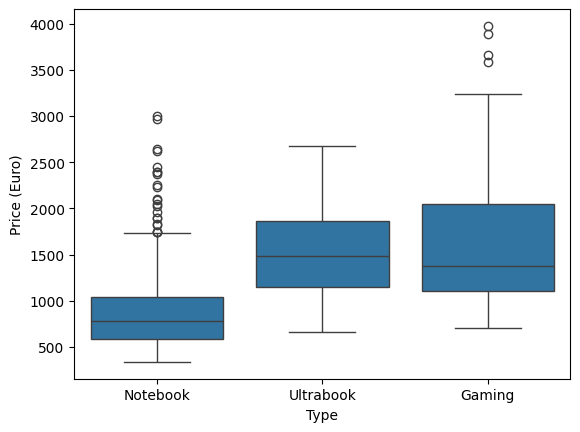

In [244]:
plot_price_distribution_per_type(df)

In [245]:
### MANUALLY GRADED TASK
def plot_laptop_count_per_type(df):
    """
    Create a bar plot showing the number of laptops available for each type.
    """

    # YOUR CODE HERE
    
    sns.barplot(df["Type"].value_counts())

    return sns
    
    raise NotImplementedError()

<module 'seaborn' from 'C:\\Users\\ACER\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\seaborn\\__init__.py'>

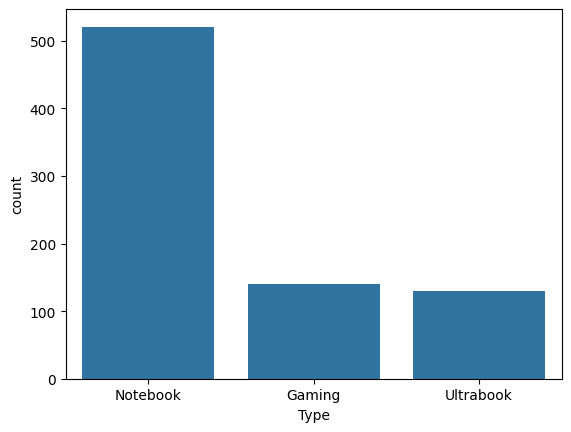

In [246]:
plot_laptop_count_per_type(df)

In [247]:
df["Brand"].unique()

array(['HP', 'Asus', 'Acer', 'Dell', 'Lenovo'], dtype=object)

In [248]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_brand(df):
    """
    Encode the `Brand` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE

    df = pd.concat([df, pd.get_dummies(df["Brand"])], axis=1)
    df.drop(columns=["Brand"], inplace=True)

    

    return pd.DataFrame(df)
    
    raise NotImplementedError()
    

In [249]:
df = encode_or_drop_brand(df)

In [250]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_brand(_df)
assert hash_data_frame(_df) == "bc0a5262a5a3c76876068bdd1d4aabc580e1a5d3e3bb5c508c59d5ed6a450c01"

In [251]:
df["Model"].unique().shape

(340,)

In [252]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_model(df):
    """
    Encode the `Model` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE

    df.drop(columns=["Model"],inplace=True)

    return pd.DataFrame(df)
    
    raise NotImplementedError()
    

In [253]:
df = encode_or_drop_model(df)

In [254]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_model(_df)
assert hash_data_frame(_df) == "2fb7e211c86372837cd099c19a3eb368088d7a41b45f676c3281e5dab2558c8f"

In [255]:
df["Type"].unique()

array(['Notebook', 'Ultrabook', 'Gaming'], dtype=object)

In [256]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_type(df):
    """
    Encode the `Type` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE

    df=pd.concat([df,pd.get_dummies(df["Type"])],axis=1)
    df.drop(columns=["Type"],inplace=True)

    return pd.DataFrame(df)
    
    raise NotImplementedError()
    

In [257]:
df = encode_or_drop_type(df)

In [258]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_model(_df)
assert hash_data_frame(_df) == "2fb7e211c86372837cd099c19a3eb368088d7a41b45f676c3281e5dab2558c8f"

In [259]:
df.head()

,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,...,Weight (kg),Price (Euro),Acer,Asus,Dell,HP,Lenovo,Gaming,Notebook,Ultrabook
0,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,NaN,True,...,1.86,575.00,False,False,False,True,False,False,True,False
1,14.0,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,...,1.30,1495.00,False,True,False,False,False,False,False,True
2,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,...,1.60,770.00,True,False,False,False,False,False,False,True
3,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,NaN,...,1.86,393.90,False,False,False,True,False,False,True,False
4,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,...,NaN,344.99,False,False,False,True,False,False,True,False


In [260]:
### AUTOMATICALLY GRADED TASK
def split_and_cast_screen_resolution(df):
    """
    Split the `Screen Resolution` column into two new integer columns
    `Horizontal Resolution` and `Vertical Resolution`. Add these columns to the dataset
    and remove the original `Screen Resolution` column.

    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE

    Horizontal_Resolution=[]
    Vertical_Resolution=[]

    for resolution in df["Screen Resolution"]:
        values=resolution.split("x")
        Horizontal_Resolution.append(int(values[0]))
        Vertical_Resolution.append(int(values[1]))

    df["Horizontal Resolution"]=Horizontal_Resolution
    df["Vertical Resolution"]=Vertical_Resolution
    df.drop(columns=["Screen Resolution"],inplace=True)

    return pd.DataFrame(df)
    
        
    raise NotImplementedError()
    

In [261]:
df = split_and_cast_screen_resolution(df)

In [262]:
_df = pd.read_csv("laptops.csv")
_df = split_and_cast_screen_resolution(_df)
assert hash_data_frame(_df) == "09262c30e1d8b769fa7bf343438f9cd9e19377e13ce232cbaad8cdb09c43fd44"

In [263]:
df["CPU Brand"].unique()

array(['Intel'], dtype=object)

In [264]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_cpu_brand(df):
    """
    Encode the `CPU Brand` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE

    df.drop(columns=["CPU Brand"],inplace=True)

    return pd.DataFrame(df)
    
    raise NotImplementedError()


In [265]:
df = encode_or_drop_cpu_brand(df)

In [266]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_cpu_brand(_df)
hash_data_frame(_df)
assert hash_data_frame(_df) == "3343d38a78aa5244e870b515abe379128a6cbdd0c0af4c427ea35bd2b9d4c0f4"

In [267]:
df["CPU Model"].unique()

array(['Core i5 7200U', 'Core i7 8550U', 'Core i5 8250U', 'Core i3 6006U',
       'Core i7 7500U', 'Core i3 7100U', 'Core i5 7300HQ',
       'Core i7 8650U', 'Core i3 7130U', 'Core i7 7700HQ',
       'Core i7 7560U', 'Core i5 7500U', 'Core i5 7Y54', 'Core i5 6200U',
       'Core i7 7820HK', 'Core i5 7300U', 'Core i7 7600U',
       'Core i7 6500U', 'Core i7 7820HQ', 'Core i5 7440HQ',
       'Core i7 6600U', 'Core i7 6700HQ', 'Core i3 6100U',
       'Core i7 6820HK', 'Core i5 6300U', 'Core i5 6300HQ',
       'Core i7 6820HQ', 'Core i7 7660U'], dtype=object)

In [268]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_cpu_model(df):
    """
    Encode the `CPU Model` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE

    df.drop(columns=["CPU Model"],inplace=True)

    return pd.DataFrame(df)
    
    raise NotImplementedError()
    

In [269]:
df = encode_or_drop_cpu_model(df)

In [270]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_cpu_model(_df)
assert hash_data_frame(_df) == "2e6601709f90f761739234d4fd5a541c0524cd39155c1e657de44340e1de9b6b"

In [271]:
df["GPU Brand"].unique()

array(['Intel', 'Nvidia', 'AMD'], dtype=object)

In [273]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_gpu_brand(df):
    """
    Encode the `GPU Brand` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE

    df=pd.concat([df,pd.get_dummies(df["GPU Brand"])],axis=1)
    df.drop(columns=["GPU Brand"],inplace=True)

    return pd.DataFrame(df)
    
    raise NotImplementedError()
    

In [274]:
df = encode_or_drop_gpu_brand(df)

In [275]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_gpu_brand(_df)
assert hash_data_frame(_df) == "9d72d28212577a75e92e38a6ba043c38cf3e638619b85eb771d76b1e60a67e9e"

In [277]:
df["GPU Model"].unique()

array(['HD Graphics 620', 'GeForce MX150', 'UHD Graphics 620',
       'HD Graphics 520', 'Radeon R5 M430', 'GeForce 940MX',
       'GeForce GTX 1050', 'Radeon 530', 'GeForce 930MX',
       'GeForce GTX 1060', 'Radeon 520', 'GeForce GTX 1050 Ti',
       'GeForce MX130', 'GeForce GTX 940MX', 'GeForce 920M',
       'Iris Plus Graphics 640', 'GeForce 920MX', 'Radeon R7 M445',
       'Radeon RX 550', 'GeForce GTX 1050M', 'R17M-M1-70',
       'GeForce 150MX', 'HD Graphics 615', 'GeForce GTX 950M',
       'FirePro W4190M', 'GeForce GTX 1080', 'GeForce GTX 980M',
       'HD Graphics 630', 'GeForce GTX 1070', 'GeForce GTX 940M',
       'HD Graphics', 'GeForce GT 940MX', 'Quadro M2200M',
       'Radeon R7 M460', 'HD Graphics 530', 'GeForce GTX 965M',
       'GeForce GTX1080', 'GeForce GTX1050 Ti', 'GeForce GTX 960M',
       'Radeon R5 M420', 'Quadro M620M', 'GeForce GTX 960<U+039C>',
       'Graphics 620', 'GeForce GTX 960', 'Radeon R5 520',
       'Quadro M2000M', 'GeForce GTX 1070M', 'GeForce 

In [278]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_gpu_model(df):
    """
    Encode the `GPU Model` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE

    df.drop(columns=["GPU Model"],inplace=True)

    return pd.DataFrame(df)
    
    raise NotImplementedError()
    

In [279]:
df = encode_or_drop_gpu_model(df)

In [280]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_gpu_model(_df)
assert hash_data_frame(_df) == "2b9f5feb888687e9c01adb73dfb64d52e93e85c7356423028ce3b6ca35825b3a"

In [281]:
df["OS"].unique()

array(['No OS', 'Windows', 'Linux'], dtype=object)

In [282]:
### AUTOMATICALLY GRADED TASK
def encode_or_drop_os(df):
    """
    Encode the `OS` variable or remove it from the dataset.

    Note: If you plan to perform one-hot encoding, use the `pd.get_dummies` function and
    append the new columns to the dataset. Also, remove the original column.
    
    Return the updated dataset as `pd.DataFrame`.
    """

    # YOUR CODE HERE

    df=pd.concat([df,pd.get_dummies(df["OS"])],axis=1)
    df.drop(columns=["OS"],inplace=True)

    return pd.DataFrame(df)
    
    raise NotImplementedError()
    

In [283]:
df = encode_or_drop_os(df)

In [284]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = encode_or_drop_os(_df)
assert hash_data_frame(_df) == "a3996c22b8e19ebc9ef0a3ae5625a9d05b41e3d05f81335345d3f6760a16ac54"

In [291]:
df.head()

,Dimension (in),CPU Frequency (GHz),RAM (GB),HDD,SSD,Weight (kg),Price (Euro),Acer,Asus,Dell,...,Notebook,Ultrabook,Horizontal Resolution,Vertical Resolution,AMD,Intel,Nvidia,Linux,No OS,Windows
0,15.6,2.5,8,NaN,True,1.86,575.00,False,False,False,...,True,False,1920,1080,False,True,False,False,True,False
1,14.0,1.8,16,False,True,1.30,1495.00,False,True,False,...,False,True,1920,1080,False,False,True,False,False,True
2,14.0,1.6,8,False,True,1.60,770.00,True,False,False,...,False,True,1920,1080,False,True,False,False,False,True
3,15.6,2.5,4,True,NaN,1.86,393.90,False,False,False,...,True,False,1366,768,False,True,False,False,True,False
4,15.6,2.0,4,True,False,NaN,344.99,False,False,False,...,True,False,1920,1080,False,True,False,False,True,False


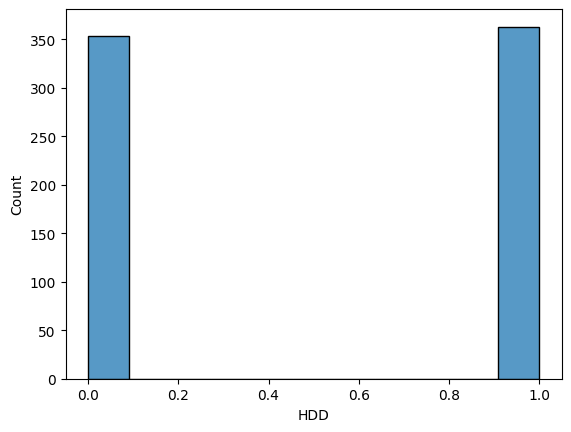

<Axes: xlabel='SSD', ylabel='Count'>

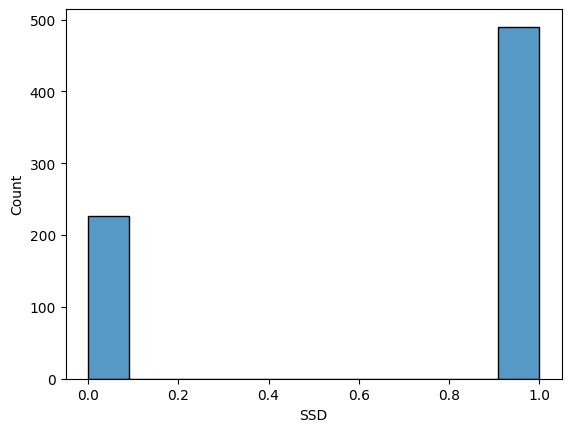

In [290]:
sns.histplot(df["HDD"])
plt.show()
sns.histplot(df["SSD"])


In [305]:
### AUTOMATICALLY GRADED TASK
def impute_hdd_and_ssd(df):
    """
    Fill in missing values in the `HDD` and `SSD` columns.

    Use `random_state=RANDOM_STATE` to ensure reproducibility.

    Return the updated dataset as a `pd.DataFrame`.
    """

    # YOUR CODE HERE

    imputer=IterativeImputer(random_state=RANDOM_STATE)

    df[["HDD", "SSD"]] = imputer.fit_transform(df[["HDD", "SSD"]])

    return pd.DataFrame(df)
    
    raise NotImplementedError()
    

In [306]:
df = impute_hdd_and_ssd(df)

In [307]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = impute_hdd_and_ssd(_df)
assert hash_data_frame(_df) == "48460c7730ee69a4b1138807c225223e328afd74b91f4c0de0377fe13d5af522"

<Axes: xlabel='Weight (kg)', ylabel='Count'>

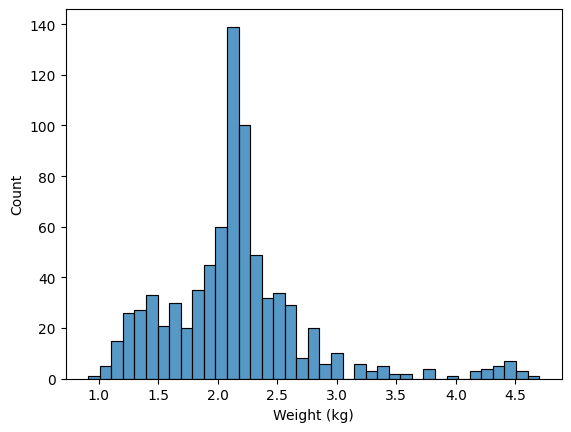

In [319]:
sns.histplot(df["Weight (kg)"])

In [383]:
### AUTOMATICALLY GRADED TASK
def impute_weight(df):
    """
    Fill in missing values in the `Weight (kg)` column.

    Use `random_state=RANDOM_STATE` to ensure reproducibility.

    Return the updated dataset as a `pd.DataFrame`.
    """

    # YOUR CODE HERE

    imputer=IterativeImputer(random_state=RANDOM_STATE)
    df[["Weight (kg)"]] = imputer.fit_transform(df[["Weight (kg)"]])

    return pd.DataFrame(df)
    
    raise NotImplementedError()
    

In [384]:
df = impute_weight(df)

In [385]:
### TEST
_df = pd.read_csv("laptops.csv")
_df = impute_weight(_df)
assert hash_data_frame(_df) == "2dc75df9d166ac93c946a68940ea318bbff0c3881a25e58af7495203512340b0"

AssertionError: 

In [386]:
### AUTOMATICALLY GRADED TASK
def partition_dataset(df):
    """
    Split the dataset into features (X) and target (y), where the target is `Price (Euro)`.
    Then, divide X and y into training and test sets using an 80:20 ratio.

    Use `random_state=RANDOM_STATE` to ensure reproducibility.
    
    Return the sets in the following order: train_X, test_X, train_y, test_y.
    """

    # YOUR CODE HERE

    X,y=df.drop(columns=["Price (Euro)"]),df["Price (Euro)"]
    train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

    return train_X, test_X, train_y, test_y
    
    raise NotImplementedError()

In [387]:
train_X, test_X, train_y, test_y = partition_dataset(df)

In [388]:
_df = pd.read_csv("laptops.csv")
_train_X, _test_X, _train_y, _test_y = partition_dataset(_df)
assert hash_data_frame(_train_X) == "04956da18ddf9c388d041b45004345b13b298ca0310967592c46e5c9b650de45"
assert hash_data_frame(_test_X) == "2be390f98b560ff81ecb70ac0630d81c50a932b68368f7f09b9d71ef02aaf23f"
assert hash_series(_train_y) == "314cbe0e97f0eade41a16b7ace6d97563f05a194f613947b3fc517b74472cf0a"
assert hash_series(_test_y) == "9211c8582f77328da6cfb22a0411523225a83f2bf4be9fabc60e97ab717c7601"

AssertionError: 

In [389]:
### AUTOMATICALLY GRADED TASK
def fit_model(train_X, train_y):
    """
    Train a Lasso (L1-regularized) linear regression model with cross-validation.
    - Use `alphas=[0.001, 0.01, 0.1, 1.0, 10.0]`.
    - Perform 10-fold cross-validation to select the best `alpha`.

    Return the trained model.
    """

    # YOUR CODE HERE

    model=LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=10).fit(train_X, train_y)

    return model
    
    raise NotImplementedError()

In [390]:
scaler = MinMaxScaler()
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1)).reshape(-1)

In [391]:
model = fit_model(train_X, train_y)

In [392]:
### TEST
_df = pd.read_csv("laptops.csv")
_model = fit_model(_df[["Dimension (in)", "CPU Frequency (GHz)", "RAM (GB)"]], _df["Price (Euro)"])
assert _model.alpha_.item() == 0.1
coef1, coef2, coef3 = _model.coef_.tolist()
assert int(coef1) == -91 and int(coef2) == 286 and int(coef3) == 83
assert int(_model.intercept_) == 1111

In [393]:
pred_y = model.predict(test_X)

In [400]:
pred_y = scaler.inverse_transform(pred_y.reshape(-1, 1)).reshape(-1)

In [2]:
### MANUALLY GRADED TASK
def evaluate_model(test_y, pred_y):
    """
    Evaluate the model's predictions using different metrics.
    
    Print the results.
    """
    # YOUR CODE HERE

    print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
    print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
    print(f"MSE: {mean_squared_error(test_y, pred_y)}")
    print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
    print(f"R2 Score: {r2_score(test_y, pred_y)}")
    
    raise NotImplementedError()

In [3]:
evaluate_model(test_y, pred_y)

NameError: name 'test_y' is not defined

In [411]:
### AUTOMATICALLY GRADED TASK
def perform_feature_selection(model, train_X, test_X):
    """
    Select features based on the trained model.
    Keep only the selected features in both training and test sets.

    Return the updated train_X and test_X.
    """

    # YOUR CODE HERE

    return train_X, test_X 

    raise NotImplementedError()

In [412]:
train_X, test_X = perform_feature_selection(model, train_X, test_X)

In [413]:
### TEST
_df = pd.read_csv("laptops.csv")
_model = fit_model(_df[["Dimension (in)", "RAM (GB)"]][:500], _df["CPU Frequency (GHz)"][:500])
_train_X, _test_X = perform_feature_selection(_model, _df[["Dimension (in)", "RAM (GB)"]][:500], _df[["Dimension (in)", "RAM (GB)"]][500:])
assert hash_data_frame(_train_X) == "4610875da9717f5758faeccc5dec8e6555bc18967aaa058ad1b2b8b503101b57"
assert hash_data_frame(_test_X) == "a429556e734d7d17615e856fced0de8943c7914f54797d316c9c44e4d1144052"